In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive/


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Xray_Classifier/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Xray_Classifier/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/train/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/train/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/test/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/test/non_xray')))

595
621
238
199


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 973 images belonging to 2 classes.
Found 242 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
31/31 [==============================] - 169s 5s/step - loss: 0.2718 - accuracy: 0.8911 - val_loss: 0.0802 - val_accuracy: 0.9752
Epoch 2/30
31/31 [==============================] - 159s 5s/step - loss: 0.1088 - accuracy: 0.9661 - val_loss: 0.0568 - val_accuracy: 0.9793
Epoch 3/30
31/31 [==============================] - 176s 6s/step - loss: 0.0709 - accuracy: 0.9846 - val_loss: 0.0496 - val_accuracy: 0.9793
Epoch 4/30
31/31 [==============================] - 179s 6s/step - loss: 0.0196 - accuracy: 0.9928 - val_loss: 0.1112 - val_accuracy: 0.9752
Epoch 5/30
31/31 [==============================] - 178s 6s/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0852 - val_accuracy: 0.9793
Epoch 6/30
31/31 [==============================] - 177s 6s/step - loss: 0.0076 - accuracy: 0.9969 - val_loss: 0.3116 - val_accuracy: 0.9380
Epoch 7/30
31/31 [==============================] - 163s 5s/step - loss: 0.0045 - accuracy: 0.9979 - val_loss: 0.0781 - val_accuracy: 0.9835
Epoch 8/30
31

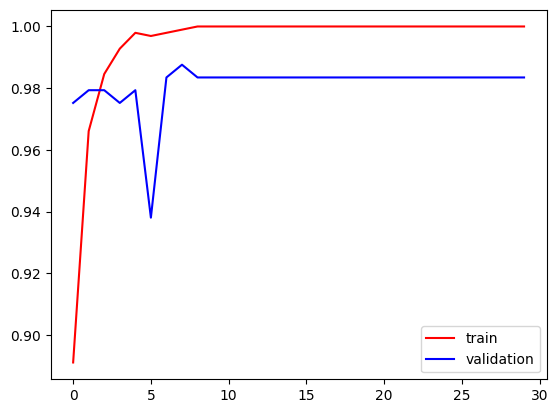

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

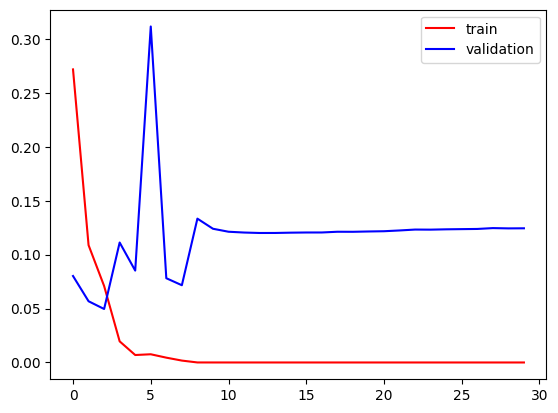

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 437 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

14/14 [==============================] - 72s 5s/step
[[9.54987556e-09]
 [0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [7.33639975e-21]
 [1.00000000e+00]
 [9.99998927e-01]
 [0.00000000e+00]
 [1.18251677e-29]
 [1.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [8.13240060e-14]
 [9.99999881e-01]
 [1.00000000e+00]
 [9.99999940e-01]
 [8.54334936e-11]
 [4.78542037e-24]
 [3.81030496e-08]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [9.99999642e-01]
 [0.00000000e+00]
 [1.00000000e+00]
 [2.36680691e-30]
 [2.67304928e-10]
 [8.55393838e-32]
 [2.55984133e-07]
 [1.00000000e+00]
 [1.52657958e-04]
 [1.20515954e-21]
 [1.00000000e+00]
 [1.31656279e-30]
 [0.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [9.99996185e-01]
 [0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [0.0000000

In [ ]:
len(predictions)

437

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 94 105]
 [102 136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.47      0.48       199
           1       0.56      0.57      0.57       238

    accuracy                           0.53       437
   macro avg       0.52      0.52      0.52       437
weighted avg       0.53      0.53      0.53       437



In [ ]:
# Pre-trained CNN

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive/


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Xray_Classifier/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Xray_Classifier/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/train/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/train/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/test/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/test/non_xray')))

595
621
238
199


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 973 images belonging to 2 classes.
Found 242 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
31/31 [==============================] - 388s 12s/step - loss: 2.1171 - accuracy: 0.5642 - val_loss: 0.8660 - val_accuracy: 0.6157
Epoch 2/3
31/31 [==============================] - 362s 12s/step - loss: 0.5117 - accuracy: 0.7492 - val_loss: 0.4877 - val_accuracy: 0.7521
Epoch 3/3
31/31 [==============================] - 339s 11s/step - loss: 0.3210 - accuracy: 0.8808 - val_loss: 0.4060 - val_accuracy: 0.8058


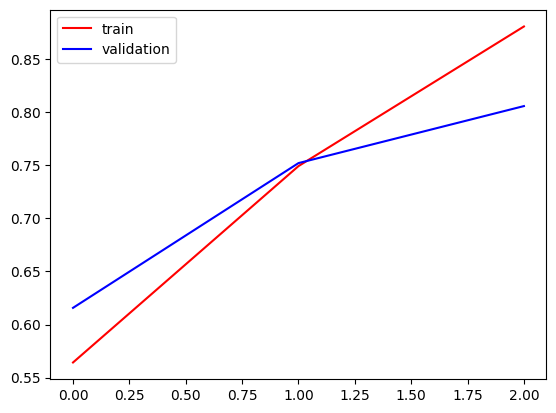

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

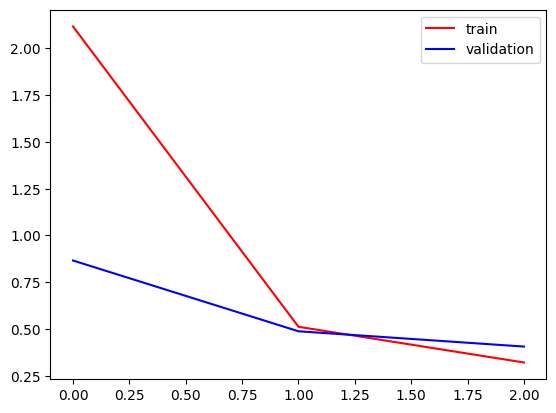

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 437 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

14/14 [==============================] - 146s 10s/step
[[9.73403096e-01]
 [9.92880285e-01]
 [5.54255426e-01]
 [8.65639389e-01]
 [2.85834700e-01]
 [3.30753550e-02]
 [9.15630400e-01]
 [8.61101687e-01]
 [7.57977128e-01]
 [2.72965759e-01]
 [8.47243071e-01]
 [5.93464226e-02]
 [4.90563847e-02]
 [8.60142231e-01]
 [3.22230533e-02]
 [8.43148112e-01]
 [2.43596166e-01]
 [9.19273436e-01]
 [8.63278091e-01]
 [9.30882215e-01]
 [6.04961766e-03]
 [6.29296958e-01]
 [6.04327738e-01]
 [1.08898804e-02]
 [6.80933893e-01]
 [8.42269659e-01]
 [8.41379821e-01]
 [2.70782530e-01]
 [6.23523712e-01]
 [6.58216774e-01]
 [8.50480258e-01]
 [1.05257116e-01]
 [1.98632717e-01]
 [1.62905443e-03]
 [4.19612341e-02]
 [1.50643796e-01]
 [2.04339027e-02]
 [1.78567246e-02]
 [9.73943174e-01]
 [2.76196212e-01]
 [8.34343433e-02]
 [8.12717080e-02]
 [6.67378485e-01]
 [1.63327809e-02]
 [1.92761227e-01]
 [9.15630400e-01]
 [3.51686209e-01]
 [8.26886237e-01]
 [3.57759833e-01]
 [3.42897892e-01]
 [1.93872172e-02]
 [5.37333250e-01]
 [8.80702

In [ ]:
len(predictions)

437

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 88 111]
 [ 94 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       199
           1       0.56      0.61      0.58       238

    accuracy                           0.53       437
   macro avg       0.52      0.52      0.52       437
weighted avg       0.53      0.53      0.53       437

